In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import matplotlib.patches as mpatches
from scipy import stats

In [4]:
data_path = r'C:\Users\roseh\Desktop\NYBG_R\data\processed'

In [5]:
df = pd.read_csv(os.path.join(data_path,'nybg_fluxes_recat1.csv'),parse_dates=['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0.1      336 non-null    int64         
 1   Unnamed: 0        336 non-null    int64         
 2   Date              336 non-null    datetime64[ns]
 3   DT_R              336 non-null    object        
 4   DT_NEE            336 non-null    object        
 5   Label             336 non-null    object        
 6   Res               208 non-null    float64       
 7   NEE               69 non-null     float64       
 8   NEE1              0 non-null      float64       
 9   NEE2              0 non-null      float64       
 10  GEE               75 non-null     float64       
 11  PAR               62 non-null     float64       
 12  Soil temperature  201 non-null    float64       
 13  Soil_moist        202 non-null    float64       
 14  type              336 non-

In [7]:
df.replace('BE_SV3','BE_UL3',inplace=True)

In [8]:
df.loc[df.Label == 'BE_UL3', 'type'] = 'UL'

In [9]:
df.replace('HL','ML',inplace=True)

In [10]:
file_path = r'C:\Users\roseh\Desktop\NYBG_R\data\processed\QC2'
df2 = pd.read_csv(os.path.join(file_path, 'NYBG_CO2_Flux_and_Temps.csv'), parse_dates = ['Date'])
df2['Day'] = df2['Date'].dt.date.astype('datetime64[ns]')

df2.drop(22,axis=0, inplace = True)

In [11]:
merge = pd.merge(df, df2, how = 'left', left_on = ['Date','Label'], right_on = ['Day', 'Collar']) 

In [12]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 0 to 337
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0.1      338 non-null    int64         
 1   Unnamed: 0_x      338 non-null    int64         
 2   Date_x            338 non-null    datetime64[ns]
 3   DT_R              338 non-null    object        
 4   DT_NEE            338 non-null    object        
 5   Label             338 non-null    object        
 6   Res               210 non-null    float64       
 7   NEE               71 non-null     float64       
 8   NEE1              0 non-null      float64       
 9   NEE2              0 non-null      float64       
 10  GEE               77 non-null     float64       
 11  PAR               64 non-null     float64       
 12  Soil temperature  203 non-null    float64       
 13  Soil_moist        204 non-null    float64       
 14  type              338 non-

In [13]:
df3 = merge[['Date_x','Label','Res','NEE','GEE','PAR','Soil temperature','Soil_moist','type','Chamber_Temp']]

In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 0 to 337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date_x            338 non-null    datetime64[ns]
 1   Label             338 non-null    object        
 2   Res               210 non-null    float64       
 3   NEE               71 non-null     float64       
 4   GEE               77 non-null     float64       
 5   PAR               64 non-null     float64       
 6   Soil temperature  203 non-null    float64       
 7   Soil_moist        204 non-null    float64       
 8   type              338 non-null    object        
 9   Chamber_Temp      161 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 29.0+ KB


In [15]:
outpath = r'C:\Users\roseh\Desktop\NYBG_R\data\processed'
df3.to_csv(os.path.join(outpath,'nybg_recat3_a.csv'))

In [12]:
def linear_fit(x,y):
    """Get slope, intercept and r2 for given x, y variables"""
    
    boo_x = ~np.isnan(x)
    boo_y = ~np.isnan(y)
    boo=np.logical_and(boo_x,boo_y)
    slope, intercept, r, p, std_err = stats.linregress(x[boo],y[boo])
    return slope,intercept, r

def myfunc(x, slope, intercept):
    """Equation of the regression line based on linear_fit"""
    
    return slope * x + intercept

In [35]:
def make_scatter_plots(grouped):
    """Plot respiration vs. soil temperature for each collar type"""
    
    colors = ['#8dd3c7','#ffd92f','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69']
    types = ['TP', 'SV', 'ML', 'FE', 'FI', 'HL', 'UL']
    color_dict = dict(zip(types,colors))
    
    for name, group in grouped:
        fig, ax = plt.subplots()
        group.plot('Chamber_Temp', 'Res', kind='scatter', color=color_dict[name], ax=ax)
        
        #slope, intercept, r = linear_fit(group['Soil temperature'], group['Res'])
       #x_range = np.arange(group['Soil temperature'].min(), group['Soil temperature'].max())
       # model = myfunc(x_range,slope,intercept)
       # ax.plot(x_range,model)
        ax.set_title(f'{name}')                                # {np.around(r,3)}')
        ax.set_ylabel('[\u03BCmol CO$_{2}$ m$^{-2}$ s$^{-1}]$')
        ax.set_ylim(0,40)
        plt.tight_layout()
        plt.show()
        if name in ['ML','UL']:
            plots_path = r'C:\Users\roseh\Desktop\NYBG_R\reports\figures'
            #fig.savefig(os.path.join(plots_path, f'recat2_plot_{name}.png'))
        plt.close()

In [36]:
grouped = merge.groupby('type')

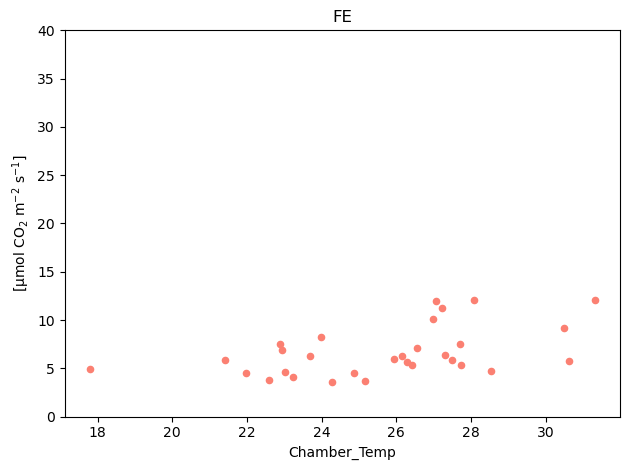

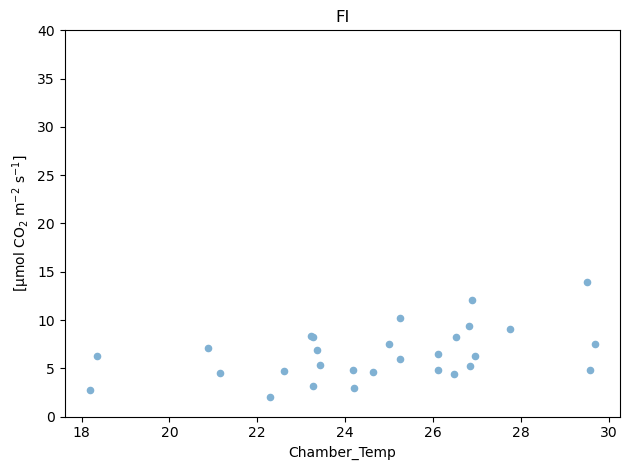

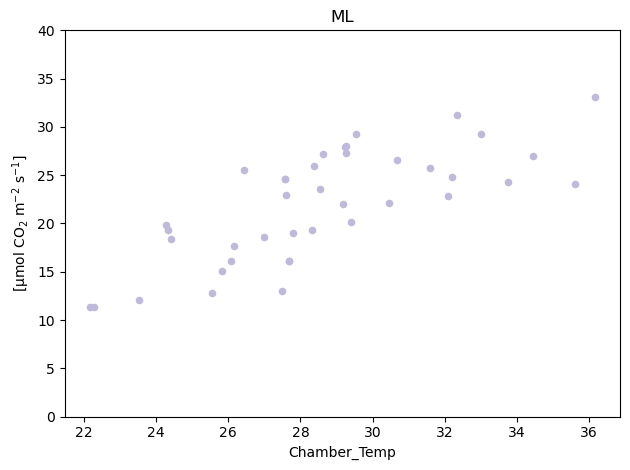

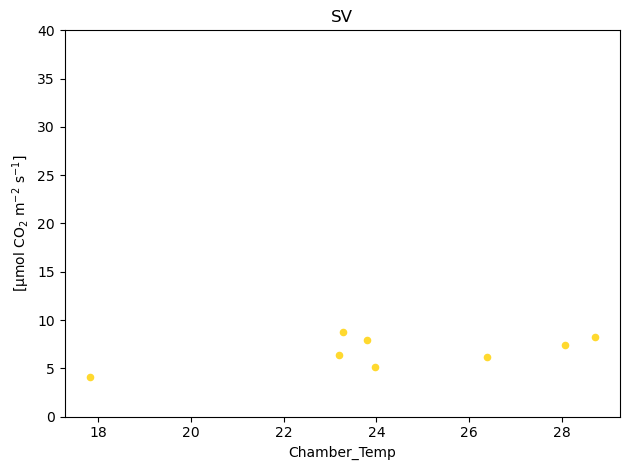

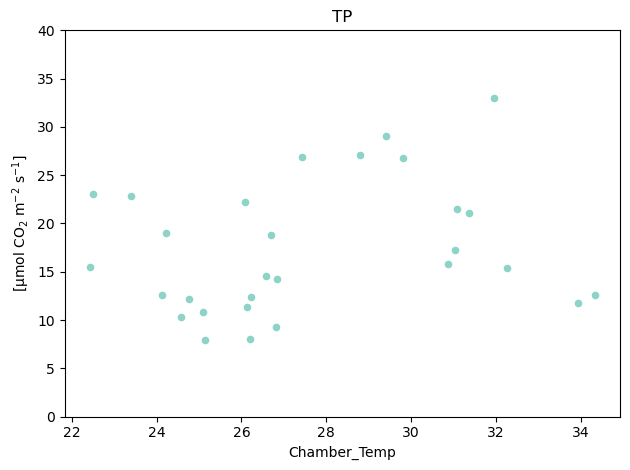

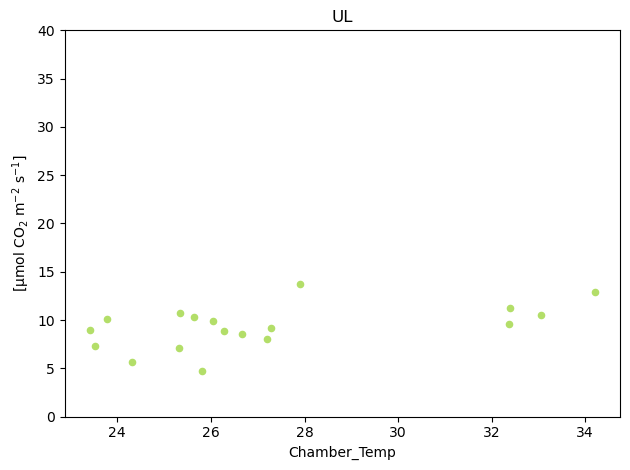

In [37]:
make_scatter_plots(grouped)

In [19]:
df2 = pd.read_csv(os.path.join(data_path,'nybg_fluxes_recat2.csv'))

In [22]:
grouped_2 = df2.groupby('type')

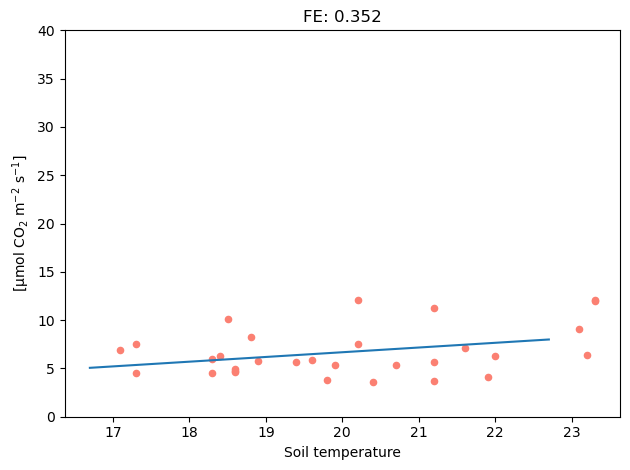

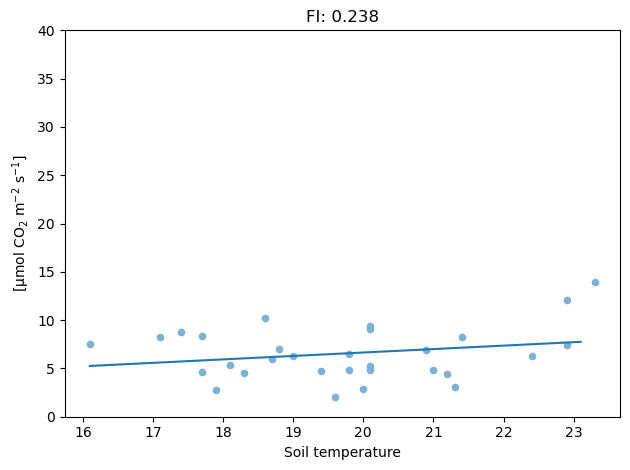

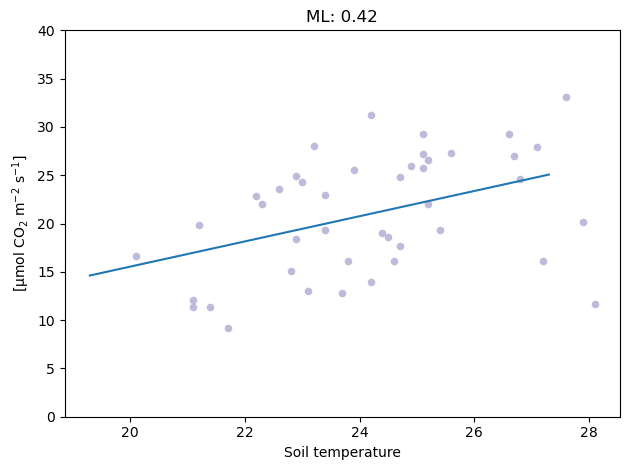

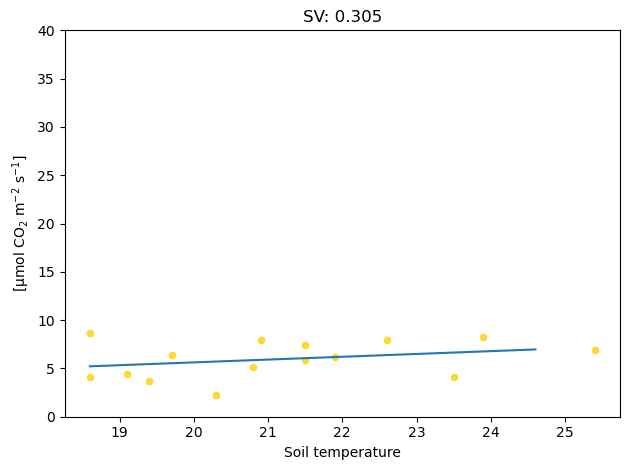

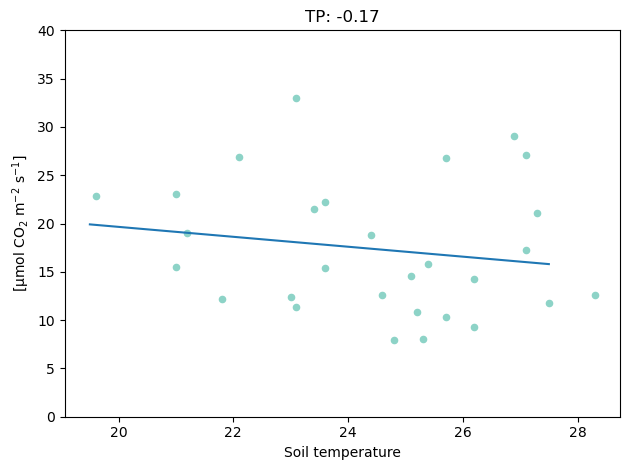

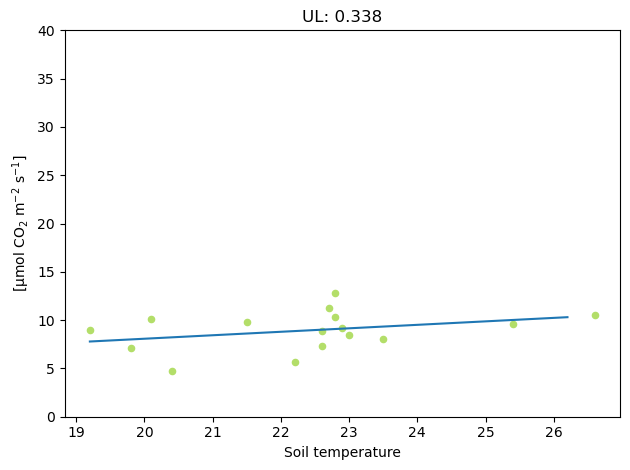

In [23]:
make_scatter_plots(grouped_2)